This file will be the finished version of the Radiation_workshop.ipynb

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import pandas as pd
from os import listdir
from os.path import isfile, join
from datetime import datetime
from scipy.stats import linregress
import glob
import tikzplotlib
from matplotlib.transforms import ScaledTranslation

from mpl_toolkits.axes_grid1 import Divider, Size

In [3]:
#Testing
#file = open("GROUPa\GA000000000000000.txt")
#content = str(file.readlines()[2][6:-1])
#print(content)
#datetime_stuff = datetime.strptime(content, "%a %b %d %X CET %Y")
#print(datetime_stuff)

In [4]:
# Make a function to extract information from the names.
#def extract_no(fname):
#    no_raw= fname[2:-4]
#    return int(no_raw)

In [5]:
# We are going to setup the files, the line, and the wavelength here

mypath = "GROUPa"
preamble = "GA"
#wl_chosen = 1310
#line_chosen = 5
#scan_length = 27000 # meters
#scan_time = 10
file_skip_lines = 17
last_line = 512
#pulse_duration = 100 #ns
#print(f"Spatial resolution: {pulse_duration/10} m")

# The dose rate
dose_rate_second = 54.72e-3# Gy/s
dose_rate_hour = dose_rate_second*3600 # Gy/h

# Sample length
L = 2 #meters

print(f"Dose rate is: {dose_rate_hour} Gy/h")

# Acquire all of the filenames
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))] # This is because there are other disturbing file
print(onlyfiles)


Dose rate is: 196.992 Gy/h
['GA000000000000000_2024-12-18-16-24-09.txt', 'GA000000000000001_2024-12-18-16-24-10.txt', 'GA000000000000002_2024-12-18-16-24-12.txt', 'GA000000000000003_2024-12-18-16-24-14.txt', 'GA000000000000004_2024-12-18-16-24-15.txt', 'GA000000000000005_2024-12-18-16-24-17.txt', 'GA000000000000006_2024-12-18-16-24-18.txt', 'GA000000000000007_2024-12-18-16-24-20.txt', 'GA000000000000008_2024-12-18-16-24-21.txt', 'GA000000000000009_2024-12-18-16-33-50.txt', 'GA000000000000010_2024-12-18-16-33-51.txt', 'GA000000000000011_2024-12-18-16-33-53.txt', 'GA000000000000012_2024-12-18-16-33-55.txt', 'GA000000000000013_2024-12-18-16-33-56.txt', 'GA000000000000014_2024-12-18-16-33-58.txt', 'GA000000000000015_2024-12-18-16-33-59.txt', 'GA000000000000016_2024-12-18-16-34-01.txt', 'GA000000000000017_2024-12-18-16-34-02.txt', 'GA000000000000018_2024-12-18-16-34-04.txt', 'GA000000000000019_2024-12-18-16-34-05.txt', 'GA000000000000020_2024-12-18-16-34-07.txt', 'GA000000000000021_2024-12-

In [6]:
# Make a function to extract information from the names.
def extract_info(fname):
    no_raw, date_raw = fname[:-4].split("_")
    no_proc = int(no_raw[2:])
    datetime_stuff = datetime.strptime(date_raw, "%Y-%m-%d-%H-%M-%S")
    return no_proc, datetime_stuff

In [7]:
#extract_info("GA000000000000000_2024-12-18-16-24-09.txt")

In [8]:
# make a function to create the filenames
def make_fname(no,date):
    datetime_stuff = datetime.strftime(date, "%Y-%m-%d-%H-%M-%S")
    return f'{mypath}/{preamble}{str(no).zfill(15)}_{datetime_stuff}.txt'

In [9]:
no_array = []
time_array = []

for fname in onlyfiles:
    # Extract the infos
    no_ext, time_ext = extract_info(fname)
    no_array.append(int(no_ext))
    time_array.append(time_ext)
        
      
            

Here we calculate the duration instead of the absolute time

In [10]:
start_time = 213

print(time_array[start_time])
onlyfiles = onlyfiles[start_time:]
no_array = no_array[start_time:]
time_array = time_array[start_time:]
len_time = len(time_array)  

2024-12-18 16:39:00


In [11]:
relative_time_array = np.zeros_like(time_array)
initial_time = time_array[0]
for i in range(len_time):
    relative_time_array[i] = (time_array[i] - initial_time).total_seconds() # Calculate in seconds

print(relative_time_array)
print(f"Measurement duration: {relative_time_array[-1]:.2f} seconds")
print(f"Time increment:{relative_time_array[1]-relative_time_array[0]:.2f} seconds")

[0.0 2.0 3.0 ... 87692.0 87693.0 87695.0]
Measurement duration: 87695.00 seconds
Time increment:2.00 seconds


In [12]:
ref_lines = np.loadtxt("GROUPa\GA000000000000009_2024-12-18-16-33-50.txt",skiprows=file_skip_lines, converters=lambda s: s.replace(b',', b'.'), max_rows=last_line)

dark_lines = np.loadtxt("GROUPa\GA000000000000134_2024-12-18-16-37-00.txt",skiprows=file_skip_lines, converters=lambda s: s.replace(b',', b'.'), max_rows=last_line)

sample_lines2000 = np.loadtxt("GROUPa\GA000000000023804_2024-12-19-02-42-48.txt",skiprows=file_skip_lines, converters=lambda s: s.replace(b',', b'.'), max_rows=last_line)

sample_lines500 = np.loadtxt("GROUPa\GA000000000006020_2024-12-18-19-05-55.txt",skiprows=file_skip_lines, converters=lambda s: s.replace(b',', b'.'), max_rows=last_line)

sample_lines1000 = np.loadtxt("GROUPa\GA000000000011732_2024-12-18-21-38-12.txt",skiprows=file_skip_lines, converters=lambda s: s.replace(b',', b'.'), max_rows=last_line)

sample_lines1500 = np.loadtxt("GROUPa\GA000000000017763_2024-12-19-00-10-29.txt",skiprows=file_skip_lines, converters=lambda s: s.replace(b',', b'.'), max_rows=last_line)

lamb_array = ref_lines[:,0]

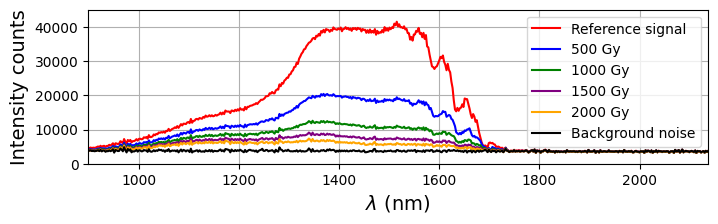

In [13]:
# Plot initial conditions:
fig_init, ax_init = plt.subplots(1,1, figsize=(8,2))
ax_init.plot(lamb_array, ref_lines[:,1], label = 'Reference signal', color = 'red')
ax_init.plot(lamb_array, sample_lines500[:,1], label = '500 Gy', color = 'blue')
ax_init.plot(lamb_array, sample_lines1000[:,1], label = '1000 Gy', color = 'green')
ax_init.plot(lamb_array, sample_lines1500[:,1], label = '1500 Gy', color = 'purple')
ax_init.plot(lamb_array, sample_lines2000[:,1], label = '2000 Gy', color = 'orange')
ax_init.plot(lamb_array, dark_lines[:,1], label = 'Background noise', color = 'black')
ax_init.set_xlabel('$\lambda$ (nm)', fontsize = 14)
ax_init.set_ylabel('Intensity counts', fontsize = 14)
ax_init.set_ylim((0,45000))
ax_init.set_xlim((min(ref_lines[:,0]), max(ref_lines[:,0])))
ax_init.legend()

ax_init.grid()
#tikzplotlib.get_tikz_code()


In [14]:
lim_min = 102
lim_max = -224


lamb_array_limited = lamb_array[lim_min:lim_max]
ref_lines_limited = ref_lines[lim_min:lim_max]
dark_lines_limited = dark_lines[lim_min:lim_max]
print(dark_lines_limited)

[[1150.54 3772.  ]
 [1153.   3721.  ]
 [1155.46 3662.  ]
 [1157.92 3684.  ]
 [1160.38 3954.  ]
 [1162.84 4164.  ]
 [1165.31 3676.  ]
 [1167.77 3919.  ]
 [1170.23 3562.  ]
 [1172.69 4286.  ]
 [1175.15 4228.  ]
 [1177.61 4111.  ]
 [1180.07 3994.  ]
 [1182.53 3324.  ]
 [1184.99 4136.  ]
 [1187.44 3780.  ]
 [1189.9  3652.  ]
 [1192.36 4004.  ]
 [1194.82 3696.  ]
 [1197.28 3954.  ]
 [1199.74 3778.  ]
 [1202.19 4088.  ]
 [1204.65 3830.  ]
 [1207.11 3586.  ]
 [1209.57 3348.  ]
 [1212.02 4025.  ]
 [1214.48 3444.  ]
 [1216.94 3734.  ]
 [1219.39 3982.  ]
 [1221.85 4074.  ]
 [1224.31 3904.  ]
 [1226.76 3811.  ]
 [1229.22 3856.  ]
 [1231.67 3578.  ]
 [1234.13 3884.  ]
 [1236.59 3370.  ]
 [1239.04 3748.  ]
 [1241.5  3958.  ]
 [1243.95 4070.  ]
 [1246.4  4364.  ]
 [1248.86 3770.  ]
 [1251.31 3740.  ]
 [1253.77 4030.  ]
 [1256.22 3984.  ]
 [1258.67 3610.  ]
 [1261.13 3786.  ]
 [1263.58 3818.  ]
 [1266.03 3975.  ]
 [1268.48 3682.  ]
 [1270.94 3303.  ]
 [1273.39 4080.  ]
 [1275.84 3678.  ]
 [1278.29 35

In [15]:
# Create the matrix the column is wavelength, the row is time.
matrix = np.array([np.loadtxt(make_fname(no_array[i],time_array[i]), skiprows=file_skip_lines, converters=lambda s: s.replace(b',', b'.'),max_rows=last_line)[:,1] for i in range(len_time)])[:,lim_min:lim_max]

GA000000000024017_2024-12-19-02-48-11.txt
time: 36551.0 seconds or 609.18 minutes
Dose: 2000.07 Gy


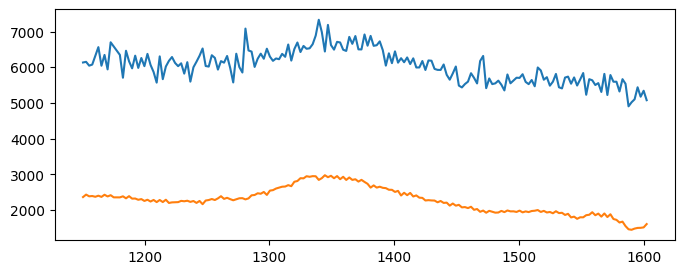

In [16]:
#Plot the graphs at different time
max_time = 23804
print(onlyfiles[max_time])
print(f"time: {relative_time_array[max_time]} seconds or {(relative_time_array[max_time]/60):.2f} minutes")
print(f"Dose: {(relative_time_array[max_time]*dose_rate_second):.2f} Gy")

fig_probe, ax_probe = plt.subplots(1,1, figsize = (8,3))
ax_probe.plot(lamb_array_limited, matrix[max_time,:])
ax_probe.plot(lamb_array_limited, matrix[max_time,:]-dark_lines_limited[:,1])

In [17]:
Corrected_ref = np.subtract(ref_lines_limited[:,1], dark_lines_limited[:,1])
RIA_1150 = np.zeros(matrix.shape[0])
# Process RIA at 1150 nm
for i in range(matrix.shape[0]):
    RIA_1150[i] = -(10/L)*np.log((matrix[i,0]-dark_lines_limited[0,1])/ Corrected_ref[0])
    
matrix_limited = matrix[:max_time, :]    

RIA_matrix = np.zeros_like(matrix_limited)
for i in range(RIA_matrix.shape[0]):
    RIA_matrix[i,:] = -(10/L)*np.log(np.divide(np.subtract(matrix[i,:], dark_lines_limited[:,1]), Corrected_ref))
    
    

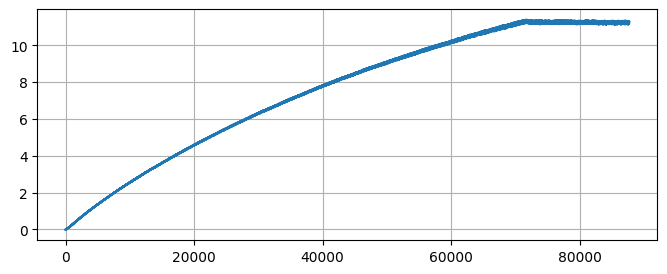

In [18]:
fig_time, ax_time = plt.subplots(1,1, figsize = (8,3))

ax_time.plot(relative_time_array, RIA_1150)
ax_time.grid()

If the fitting is ok, it is now time to calculate the whole RIA

1150.54
1602.36


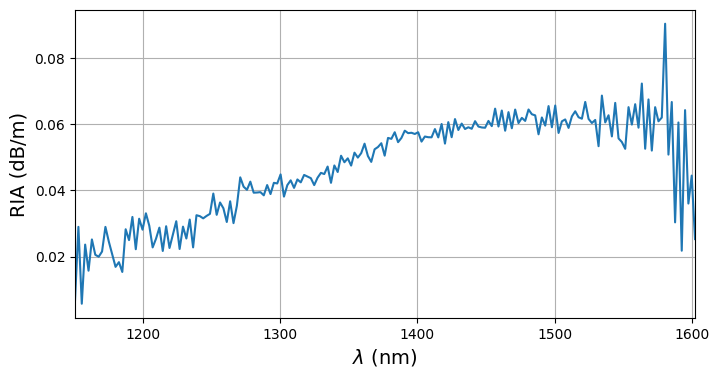

In [19]:


fig_RIA, ax_RIA = plt.subplots(1,1, figsize = (8,4))

ax_RIA.plot(lamb_array_limited, RIA_matrix[100,:])
ax_RIA.set_ylabel('RIA (dB/m)', fontsize = 14)
ax_RIA.set_xlabel('$\lambda$ (nm)', fontsize = 14)
ax_RIA.set_xlim(min(lamb_array_limited), max(lamb_array_limited))
ax_RIA.grid()
print(min(lamb_array_limited))
print(max(lamb_array_limited))





In [20]:
print(relative_time_array[:6020]*dose_rate_second)
print(RIA_matrix[:6020,0])

[0.0 0.10944 0.16416 ... 499.75775999999996 499.86719999999997 499.92192]
[-0.02151382 -0.01125741 -0.0176091  ...  2.35276292  2.35119429
  2.34805851]


In [21]:
def lin_func(x,m,c):
    return m*x+c

In [22]:
curve_fit(lin_func, relative_time_array[:6020]*dose_rate_second, RIA_matrix[:6020,0], method='lm')

(array([0.00478205, 0.018105  ]),
 array([[ 6.59338313e-12, -1.64932740e-09],
        [-1.64932740e-09,  5.49842020e-07]]))

In [23]:
# Linear regression

reg_res1150,_ = curve_fit(lin_func, relative_time_array[:6020]*dose_rate_second, RIA_matrix[:6020,0], method='lm')
reg_res1310,_ = curve_fit(lin_func, relative_time_array[:6020]*dose_rate_second, RIA_matrix[:6020,65], method='lm')
reg_res1550,_ = curve_fit(lin_func, relative_time_array[:6020]*dose_rate_second, RIA_matrix[:6020,164], method='lm')

In [24]:
print(f"The RIA sensitivity at 1150 nm is {reg_res1150[0]*1000} dB/km Gy")
print(f"The RIA sensitivity at 1310 nm is {reg_res1310[0]*1000} dB/km Gy")
print(f"The RIA sensitivity at 1550 nm is {reg_res1550[0]*1000} dB/km Gy")

The RIA sensitivity at 1150 nm is 4.782045756370423 dB/km Gy
The RIA sensitivity at 1310 nm is 7.038312933600078 dB/km Gy
The RIA sensitivity at 1550 nm is 9.724553108176194 dB/km Gy


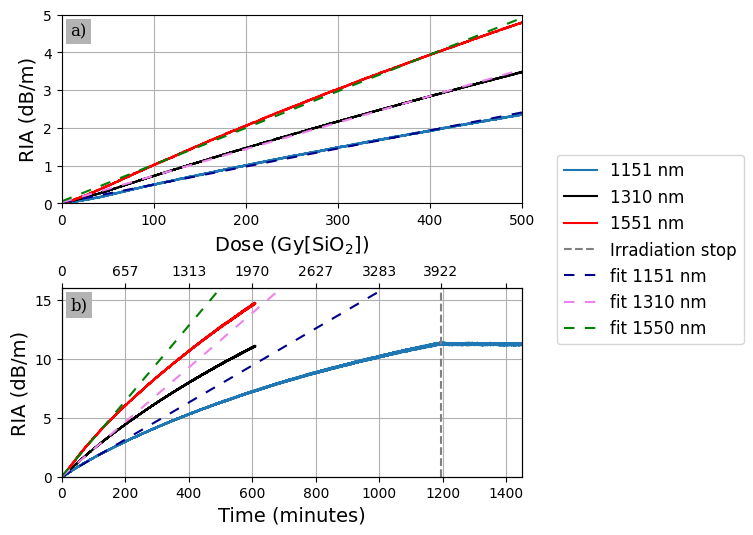

In [100]:




idx_interest = np.array([65,164])

lamb_label = lamb_array_limited[idx_interest]
color_array = ['black','red','blue', 'green', 'orange']

fig_final, ax_final = plt.subplots(2,1, figsize = (8,6), gridspec_kw = {'hspace':0.45})



#ax_final[0].
ax_final[1].plot(relative_time_array/60, RIA_1150, label = f"{lamb_array_limited[0]:.0f} nm")

for i, idx in enumerate(idx_interest):
    ax_final[1].plot(relative_time_array[:max_time]/60, RIA_matrix[:,idx], color = color_array[i],zorder = 2, label = f"{lamb_label[i]:.0f} nm")
    #print(RIA_matrix[3620,idx])
    



    
ax_final[1].set_ylabel("RIA (dB/m)", fontsize = 14)
ax_final[1].set_xlabel("Time (minutes)", fontsize = 14)
ax_final[1].set_ylim(0,16)
ax_final[1].set_xlim(0, 1450)
ax_final[1].grid(zorder = 1)
ax_final[1].axvline(relative_time_array[47025]/60, color = 'grey', linestyle = '--', label = 'Irradiation stop')

ax_final[1].axline((0,reg_res1150[1]), slope = reg_res1150[0]*60*dose_rate_second, color = 'darkblue', linestyle = (0,(5,5)), label = 'fit 1151 nm')
ax_final[1].axline((0,reg_res1310[1]), slope = reg_res1310[0]*60*dose_rate_second, color = 'violet', linestyle = (0,(5,5)), label = 'fit 1310 nm')
ax_final[1].axline((0,reg_res1550[1]), slope = reg_res1550[0]*60*dose_rate_second, color = 'green', linestyle = (0,(5,5)), label = 'fit 1550 nm')  

 

#ax_final.set_xticks([0,1200,2400,3600,4800,6000])
#ax_final.set_xticklabels([0,20,40,60,80,100])
leg1 = ax_final[1].legend(prop={'size': 12})
bb = leg1.get_bbox_to_anchor().transformed(ax_final[1].transAxes.inverted())

xOffset = 0.5
yOffset = 0.75
bb.x0 += xOffset
bb.x1 += xOffset
bb.y0 += yOffset
bb.y1 += yOffset
leg1.set_bbox_to_anchor(bb, transform = ax_final[1].transAxes)

# REMEMBER, do the second axis after the first axis
ax_final2 = ax_final[1].twiny()

# Set the ticks BEFORE setting the xlim!
tick_pos = ax_final[1].get_xticks()
time_plot = np.array([0,200,400,600,800,1000,1194.7,1400,1600])
dose = time_plot*60*dose_rate_second
dose_plot = [f"{number:.0f}" for number in dose[:-2]]
dose_plot.append(None)
dose_plot.append(None)

ax_final2.set_xticks(time_plot)

#print(dose_plot.astype('|S8'))


ax_final2.set_xlim(ax_final[1].get_xlim())


# Set the new labels
#new_labels = [f"{val/1000:.2f}" for i, val in enumerate(ax_final.get_xticks()*dose_rate_second)]
new_labels = dose_plot
ax_final2.set_xticklabels(new_labels)

ax_final2.set_xlabel("Dose (Gy[SiO$_2$])", fontsize = 14, labelpad=10)
#ax_final2.axvline(500/(60*dose_rate_second))


ax_final[0].plot(relative_time_array*dose_rate_second, RIA_1150, label = f"{lamb_array_limited[0]:.0f} nm")

for i, idx in enumerate(idx_interest):
    ax_final[0].plot(relative_time_array[:max_time]*dose_rate_second, RIA_matrix[:,idx], color = color_array[i],zorder = 2, label = f"{lamb_label[i]:.0f} nm")
    #print(RIA_matrix[3620,idx])
    
    
axs = [("a)", ax_final[0]), ("b)", ax_final[1])]    
    
for label, ax in axs:
    # Use Axes.annotate to put the label
    # - at the top left corner (axes fraction (0, 1)),
    # - offset half-a-fontsize right and half-a-fontsize down
    #   (offset fontsize (+0.5, -0.5)),
    # i.e. just inside the axes.
    ax.annotate(
        label,
        xy=(0, 1), xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize='large', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
    
ax_final[0].axline((0,reg_res1150[1]), slope = reg_res1150[0], color = 'darkblue', linestyle = (0,(5,5)), label = 'fit 1151 nm')
ax_final[0].axline((0,reg_res1310[1]), slope = reg_res1310[0], color = 'violet', linestyle = (0,(5,5)), label = 'fit 1310 nm')
ax_final[0].axline((0,reg_res1550[1]), slope = reg_res1550[0], color = 'green', linestyle = (0,(5,5)), label = 'fit 1550 nm')  



ax_final[0].set_ylabel("RIA (dB/m)", fontsize = 14)
ax_final[0].set_xlim(0,500)
ax_final[0].set_ylim(0,5)
ax_final[0].grid()

plt.subplots_adjust(right=0.7)

#leg0 = ax_final[0].legend(loc = 9, prop={'size': 10})

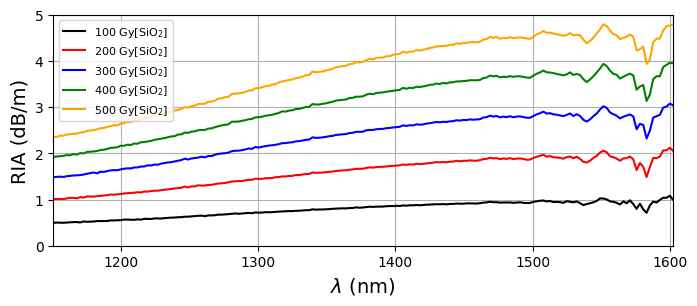

In [101]:
irr_idx = [1201, 2404, 3611, 4815, 6020]
rec_idx = [3620, 4800, 5981]

fig_time, ax_time = plt.subplots(1,1, figsize = (8,3))
for i, idx in enumerate(irr_idx):
    ax_time.plot(lamb_array_limited, RIA_matrix[idx], label = f"{relative_time_array[idx]*dose_rate_second:.0f} Gy[SiO$_2$]", color = color_array[i])
    
#for i, idx in enumerate(rec_idx):
#    ax_time[1].plot(lamb_array_limited, RIA_matrix[idx], label = f"Recovery time: {(relative_time_array[idx]-relative_time_array[3620])/60:.2f} minutes", color = color_array[i])
    
#axs = [("a)", ax_time[0]), ("b)", ax_time[1])]    
    
#for label, ax in axs:
    # Use Axes.annotate to put the label
    # - at the top left corner (axes fraction (0, 1)),
    # - offset half-a-fontsize right and half-a-fontsize down
    #   (offset fontsize (+0.5, -0.5)),
    # i.e. just inside the axes.
    #ax.annotate(
        #label,
        #xy=(0, 1), xycoords='axes fraction',
        #xytext=(+0.5, -0.5), textcoords='offset fontsize',
        #fontsize='large', verticalalignment='top', fontfamily='serif',
        #bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))

    
ax_time.legend(prop={'size': 8})
ax_time.set_xlim(min(lamb_array_limited), max(lamb_array_limited))
ax_time.set_ylim(0,5)
ax_time.set_xlabel("$\lambda$ (nm)", fontsize = 14)
ax_time.set_ylabel("RIA (dB/m)", fontsize = 14)
#ax_time.axvline(1550)
ax_time.grid()

#ax_time[1].legend()
#ax_time[1].set_xlim(min(lamb_array_limited), max(lamb_array_limited))
#ax_time[1].set_ylim(0,0.5)
#ax_time[1].set_xlabel("$\lambda$ (nm)", fontsize = 14)
#ax_time[1].set_ylabel("RIA (dB/m)", fontsize = 14)
#ax_time[1].grid()

In [139]:
# Export the data

# aggregate all of the data first
#all_data = np.array([shifted_time_array, actual_RIA]).transpose()
#df = pd.DataFrame(all_data)
#df
#df.to_csv(f"RIA_{line_chosen}_{wl_chosen}.csv", index=False)